In [1]:
import pandas as pd
from datetime import datetime,timedelta
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import os
import squarify
import time
import pickle
import datetime

# Importar modelos y otras librerías
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import lazypredict

# podemos añadir los estimadores que nos interesen
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from hyperopt import fmin, hp, tpe, Trials, space_eval
from hyperopt.pyll import scope as ho_scope
from hyperopt.pyll.stochastic import sample as ho_sample
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

c:\users\xhito\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df=pd.read_csv('.\input\ACCIDENTALIDAD_TODO_NUMERO_090422.csv')
df.drop(['hora_densidad_ponderado','tipo_persona_densidad_ponderado'],axis=1,inplace=True)
#drops - 'distrito_desnsidad_ponderado','tipo_accidente_densidad_ponderado'
df

,Interseccion,AltaVelocidad,lesividad,vehiculo_furgoneta,vehiculo_motocilceta,vehiculo_resto,vehiculo_turismo,densidad_accidente,prec,tmed,vrf_Despejado,vrf_Lluvioso,vrf_Granizando,vrf_Nevando,vrf_Lluvia débil,vrf_Se_desconoce,vrf_Nublado,n_victimas,media_mes_prec,%accidente_mes,%sexo,Hombre,Mujer,%hombre,%Mujer,distrito_desnsidad_ponderado,tipo_accidente_densidad_ponderado,%accidentes_distrito,%localizacion_distrito,hora_Noche,hora_Punta,hora_Valle,tipo_accidente_Alcance,tipo_accidente_Atropello a animal,tipo_accidente_Atropello a persona,tipo_accidente_Caída,tipo_accidente_Choque contra obstáculo fijo,tipo_accidente_Colisión frontal,tipo_accidente_Colisión fronto-lateral,tipo_accidente_Colisión lateral,tipo_accidente_Colisión múltiple,tipo_accidente_Despeñamiento,tipo_accidente_Otro,tipo_accidente_Solo salida de la vía,tipo_accidente_Vuelco,rango_edad_De 10 a 14 años,rango_edad_De 15 a 17 años,rango_edad_De 18 a 20 años,rango_edad_De 21 a 24 años,rango_edad_De 25 a 29 años,rango_edad_De 30 a 34 años,rango_edad_De 35 a 39 años,rango_edad_De 40 a 44 años,rango_edad_De 45 a 49 años,rango_edad_De 50 a 54 años,rango_edad_De 55 a 59 años,rango_edad_De 6 a 9 años,rango_edad_De 60 a 64 años,rango_edad_De 65 a 69 años,rango_edad_De 70 a 74 años,rango_edad_Desconocido,rango_edad_Menor de 5 años,rango_edad_Más de 74 años,tipo_persona_Conductor,tipo_persona_Pasajero,tipo_persona_Peatón,sexo_Desconocido,sexo_Hombre,sexo_Mujer,positiva_alcohol_N,positiva_alcohol_S,distrito_ARGANZUELA,distrito_BARAJAS,distrito_CARABANCHEL,distrito_CENTRO,distrito_CHAMARTÍN,distrito_CHAMBERÍ,distrito_CIUDAD LINEAL,distrito_FUENCARRAL-EL PARDO,distrito_HORTALEZA,distrito_LATINA,distrito_MONCLOA-ARAVACA,distrito_MORATALAZ,distrito_PUENTE DE VALLECAS,distrito_RETIRO,distrito_SALAMANCA,distrito_SAN BLAS-CANILLEJAS,distrito_TETUÁN,distrito_USERA,distrito_VICÁLVARO,distrito_VILLA DE VALLECAS,distrito_VILLAVERDE
0,1.00,0.00,14.00,0.00,0.00,0.00,1.00,27.64,0.00,6.60,1,0,0,0,0,0,0,1,1.18,9.16,60.63,7702,4034,65.62,34.37,21.93,22.95,6.62,0.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.00,0.00,14.00,0.00,0.00,0.00,1.00,53.65,0.00,24.00,1,0,0,0,0,0,0,2,1.35,7.65,60.63,7702,4034,65.62,34.37,42.56,44.55,6.62,0.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.00,0.00,14.00,0.00,0.00,0.00,1.00,9.66,0.00,24.00,1,0,0,0,0,0,0,2,1.35,7.65,28.73,7702,4034,65.62,34.37,7.66,8.02,6.62,0.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.00,0.00,14.00,0.00,0.00,0.00,1.00,58.25,0.10,20.50,1,0,0,0,0,0,0,2,1.35,7.65,60.63,6257,2570,70.88,29.11,46.22,48.37,6.62,0.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.00,0.00,14.00,0.00,0.00,0.00,1.00,1.97,5.40,29.50,0,0,0,0,0,0,0,2,1.94,7.05,60.63,7638,3740,67.11,32.86,1.56,1.56,6.62,0.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108233,1.00,0.00,14.00,0.00,0.00,1.00,0.00,102.10,0.00,25.30,1,0,0,0,0,0,0,3,1.43,9.02,60.63,7638,3740,67.11,32.86,81.02,80.86,3.00,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
108234,1.00,0.00,6.00,0.00,0.00,1.00,0.00,90.91,0.00,25.30,1,0,0,0,0,0,0,3,1.43,9.02,28.73,7707,3511,68.70,31.30,72.14,72.00,3.00,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [3]:
df['lesividad']=df['lesividad'].apply(lambda x: 14 if x==' ' else x)
df


,Interseccion,AltaVelocidad,lesividad,vehiculo_furgoneta,vehiculo_motocilceta,vehiculo_resto,vehiculo_turismo,densidad_accidente,prec,tmed,vrf_Despejado,vrf_Lluvioso,vrf_Granizando,vrf_Nevando,vrf_Lluvia débil,vrf_Se_desconoce,vrf_Nublado,n_victimas,media_mes_prec,%accidente_mes,%sexo,Hombre,Mujer,%hombre,%Mujer,distrito_desnsidad_ponderado,tipo_accidente_densidad_ponderado,%accidentes_distrito,%localizacion_distrito,hora_Noche,hora_Punta,hora_Valle,tipo_accidente_Alcance,tipo_accidente_Atropello a animal,tipo_accidente_Atropello a persona,tipo_accidente_Caída,tipo_accidente_Choque contra obstáculo fijo,tipo_accidente_Colisión frontal,tipo_accidente_Colisión fronto-lateral,tipo_accidente_Colisión lateral,tipo_accidente_Colisión múltiple,tipo_accidente_Despeñamiento,tipo_accidente_Otro,tipo_accidente_Solo salida de la vía,tipo_accidente_Vuelco,rango_edad_De 10 a 14 años,rango_edad_De 15 a 17 años,rango_edad_De 18 a 20 años,rango_edad_De 21 a 24 años,rango_edad_De 25 a 29 años,rango_edad_De 30 a 34 años,rango_edad_De 35 a 39 años,rango_edad_De 40 a 44 años,rango_edad_De 45 a 49 años,rango_edad_De 50 a 54 años,rango_edad_De 55 a 59 años,rango_edad_De 6 a 9 años,rango_edad_De 60 a 64 años,rango_edad_De 65 a 69 años,rango_edad_De 70 a 74 años,rango_edad_Desconocido,rango_edad_Menor de 5 años,rango_edad_Más de 74 años,tipo_persona_Conductor,tipo_persona_Pasajero,tipo_persona_Peatón,sexo_Desconocido,sexo_Hombre,sexo_Mujer,positiva_alcohol_N,positiva_alcohol_S,distrito_ARGANZUELA,distrito_BARAJAS,distrito_CARABANCHEL,distrito_CENTRO,distrito_CHAMARTÍN,distrito_CHAMBERÍ,distrito_CIUDAD LINEAL,distrito_FUENCARRAL-EL PARDO,distrito_HORTALEZA,distrito_LATINA,distrito_MONCLOA-ARAVACA,distrito_MORATALAZ,distrito_PUENTE DE VALLECAS,distrito_RETIRO,distrito_SALAMANCA,distrito_SAN BLAS-CANILLEJAS,distrito_TETUÁN,distrito_USERA,distrito_VICÁLVARO,distrito_VILLA DE VALLECAS,distrito_VILLAVERDE
0,1.00,0.00,14.00,0.00,0.00,0.00,1.00,27.64,0.00,6.60,1,0,0,0,0,0,0,1,1.18,9.16,60.63,7702,4034,65.62,34.37,21.93,22.95,6.62,0.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.00,0.00,14.00,0.00,0.00,0.00,1.00,53.65,0.00,24.00,1,0,0,0,0,0,0,2,1.35,7.65,60.63,7702,4034,65.62,34.37,42.56,44.55,6.62,0.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.00,0.00,14.00,0.00,0.00,0.00,1.00,9.66,0.00,24.00,1,0,0,0,0,0,0,2,1.35,7.65,28.73,7702,4034,65.62,34.37,7.66,8.02,6.62,0.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.00,0.00,14.00,0.00,0.00,0.00,1.00,58.25,0.10,20.50,1,0,0,0,0,0,0,2,1.35,7.65,60.63,6257,2570,70.88,29.11,46.22,48.37,6.62,0.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.00,0.00,14.00,0.00,0.00,0.00,1.00,1.97,5.40,29.50,0,0,0,0,0,0,0,2,1.94,7.05,60.63,7638,3740,67.11,32.86,1.56,1.56,6.62,0.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108233,1.00,0.00,14.00,0.00,0.00,1.00,0.00,102.10,0.00,25.30,1,0,0,0,0,0,0,3,1.43,9.02,60.63,7638,3740,67.11,32.86,81.02,80.86,3.00,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
108234,1.00,0.00,6.00,0.00,0.00,1.00,0.00,90.91,0.00,25.30,1,0,0,0,0,0,0,3,1.43,9.02,28.73,7707,3511,68.70,31.30,72.14,72.00,3.00,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [4]:
df['lesividad']=df['lesividad'].astype(float)
df['lesividad']=df['lesividad'].astype(int)
df['lesividad']=df['lesividad'].astype(object)
df

,Interseccion,AltaVelocidad,lesividad,vehiculo_furgoneta,vehiculo_motocilceta,vehiculo_resto,vehiculo_turismo,densidad_accidente,prec,tmed,vrf_Despejado,vrf_Lluvioso,vrf_Granizando,vrf_Nevando,vrf_Lluvia débil,vrf_Se_desconoce,vrf_Nublado,n_victimas,media_mes_prec,%accidente_mes,%sexo,Hombre,Mujer,%hombre,%Mujer,distrito_desnsidad_ponderado,tipo_accidente_densidad_ponderado,%accidentes_distrito,%localizacion_distrito,hora_Noche,hora_Punta,hora_Valle,tipo_accidente_Alcance,tipo_accidente_Atropello a animal,tipo_accidente_Atropello a persona,tipo_accidente_Caída,tipo_accidente_Choque contra obstáculo fijo,tipo_accidente_Colisión frontal,tipo_accidente_Colisión fronto-lateral,tipo_accidente_Colisión lateral,tipo_accidente_Colisión múltiple,tipo_accidente_Despeñamiento,tipo_accidente_Otro,tipo_accidente_Solo salida de la vía,tipo_accidente_Vuelco,rango_edad_De 10 a 14 años,rango_edad_De 15 a 17 años,rango_edad_De 18 a 20 años,rango_edad_De 21 a 24 años,rango_edad_De 25 a 29 años,rango_edad_De 30 a 34 años,rango_edad_De 35 a 39 años,rango_edad_De 40 a 44 años,rango_edad_De 45 a 49 años,rango_edad_De 50 a 54 años,rango_edad_De 55 a 59 años,rango_edad_De 6 a 9 años,rango_edad_De 60 a 64 años,rango_edad_De 65 a 69 años,rango_edad_De 70 a 74 años,rango_edad_Desconocido,rango_edad_Menor de 5 años,rango_edad_Más de 74 años,tipo_persona_Conductor,tipo_persona_Pasajero,tipo_persona_Peatón,sexo_Desconocido,sexo_Hombre,sexo_Mujer,positiva_alcohol_N,positiva_alcohol_S,distrito_ARGANZUELA,distrito_BARAJAS,distrito_CARABANCHEL,distrito_CENTRO,distrito_CHAMARTÍN,distrito_CHAMBERÍ,distrito_CIUDAD LINEAL,distrito_FUENCARRAL-EL PARDO,distrito_HORTALEZA,distrito_LATINA,distrito_MONCLOA-ARAVACA,distrito_MORATALAZ,distrito_PUENTE DE VALLECAS,distrito_RETIRO,distrito_SALAMANCA,distrito_SAN BLAS-CANILLEJAS,distrito_TETUÁN,distrito_USERA,distrito_VICÁLVARO,distrito_VILLA DE VALLECAS,distrito_VILLAVERDE
0,1.00,0.00,14,0.00,0.00,0.00,1.00,27.64,0.00,6.60,1,0,0,0,0,0,0,1,1.18,9.16,60.63,7702,4034,65.62,34.37,21.93,22.95,6.62,0.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.00,0.00,14,0.00,0.00,0.00,1.00,53.65,0.00,24.00,1,0,0,0,0,0,0,2,1.35,7.65,60.63,7702,4034,65.62,34.37,42.56,44.55,6.62,0.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.00,0.00,14,0.00,0.00,0.00,1.00,9.66,0.00,24.00,1,0,0,0,0,0,0,2,1.35,7.65,28.73,7702,4034,65.62,34.37,7.66,8.02,6.62,0.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.00,0.00,14,0.00,0.00,0.00,1.00,58.25,0.10,20.50,1,0,0,0,0,0,0,2,1.35,7.65,60.63,6257,2570,70.88,29.11,46.22,48.37,6.62,0.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.00,0.00,14,0.00,0.00,0.00,1.00,1.97,5.40,29.50,0,0,0,0,0,0,0,2,1.94,7.05,60.63,7638,3740,67.11,32.86,1.56,1.56,6.62,0.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108233,1.00,0.00,14,0.00,0.00,1.00,0.00,102.10,0.00,25.30,1,0,0,0,0,0,0,3,1.43,9.02,60.63,7638,3740,67.11,32.86,81.02,80.86,3.00,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
108234,1.00,0.00,6,0.00,0.00,1.00,0.00,90.91,0.00,25.30,1,0,0,0,0,0,0,3,1.43,9.02,28.73,7707,3511,68.70,31.30,72.14,72.00,3.00,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

In [5]:
df3=df.drop('lesividad',axis=1)
target=df['lesividad']
df3

,Interseccion,AltaVelocidad,vehiculo_furgoneta,vehiculo_motocilceta,vehiculo_resto,vehiculo_turismo,densidad_accidente,prec,tmed,vrf_Despejado,vrf_Lluvioso,vrf_Granizando,vrf_Nevando,vrf_Lluvia débil,vrf_Se_desconoce,vrf_Nublado,n_victimas,media_mes_prec,%accidente_mes,%sexo,Hombre,Mujer,%hombre,%Mujer,distrito_desnsidad_ponderado,tipo_accidente_densidad_ponderado,%accidentes_distrito,%localizacion_distrito,hora_Noche,hora_Punta,hora_Valle,tipo_accidente_Alcance,tipo_accidente_Atropello a animal,tipo_accidente_Atropello a persona,tipo_accidente_Caída,tipo_accidente_Choque contra obstáculo fijo,tipo_accidente_Colisión frontal,tipo_accidente_Colisión fronto-lateral,tipo_accidente_Colisión lateral,tipo_accidente_Colisión múltiple,tipo_accidente_Despeñamiento,tipo_accidente_Otro,tipo_accidente_Solo salida de la vía,tipo_accidente_Vuelco,rango_edad_De 10 a 14 años,rango_edad_De 15 a 17 años,rango_edad_De 18 a 20 años,rango_edad_De 21 a 24 años,rango_edad_De 25 a 29 años,rango_edad_De 30 a 34 años,rango_edad_De 35 a 39 años,rango_edad_De 40 a 44 años,rango_edad_De 45 a 49 años,rango_edad_De 50 a 54 años,rango_edad_De 55 a 59 años,rango_edad_De 6 a 9 años,rango_edad_De 60 a 64 años,rango_edad_De 65 a 69 años,rango_edad_De 70 a 74 años,rango_edad_Desconocido,rango_edad_Menor de 5 años,rango_edad_Más de 74 años,tipo_persona_Conductor,tipo_persona_Pasajero,tipo_persona_Peatón,sexo_Desconocido,sexo_Hombre,sexo_Mujer,positiva_alcohol_N,positiva_alcohol_S,distrito_ARGANZUELA,distrito_BARAJAS,distrito_CARABANCHEL,distrito_CENTRO,distrito_CHAMARTÍN,distrito_CHAMBERÍ,distrito_CIUDAD LINEAL,distrito_FUENCARRAL-EL PARDO,distrito_HORTALEZA,distrito_LATINA,distrito_MONCLOA-ARAVACA,distrito_MORATALAZ,distrito_PUENTE DE VALLECAS,distrito_RETIRO,distrito_SALAMANCA,distrito_SAN BLAS-CANILLEJAS,distrito_TETUÁN,distrito_USERA,distrito_VICÁLVARO,distrito_VILLA DE VALLECAS,distrito_VILLAVERDE
0,1.00,0.00,0.00,0.00,0.00,1.00,27.64,0.00,6.60,1,0,0,0,0,0,0,1,1.18,9.16,60.63,7702,4034,65.62,34.37,21.93,22.95,6.62,0.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.00,0.00,0.00,0.00,0.00,1.00,53.65,0.00,24.00,1,0,0,0,0,0,0,2,1.35,7.65,60.63,7702,4034,65.62,34.37,42.56,44.55,6.62,0.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.00,0.00,0.00,0.00,0.00,1.00,9.66,0.00,24.00,1,0,0,0,0,0,0,2,1.35,7.65,28.73,7702,4034,65.62,34.37,7.66,8.02,6.62,0.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.00,0.00,0.00,0.00,0.00,1.00,58.25,0.10,20.50,1,0,0,0,0,0,0,2,1.35,7.65,60.63,6257,2570,70.88,29.11,46.22,48.37,6.62,0.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.00,0.00,0.00,0.00,0.00,1.00,1.97,5.40,29.50,0,0,0,0,0,0,0,2,1.94,7.05,60.63,7638,3740,67.11,32.86,1.56,1.56,6.62,0.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108233,1.00,0.00,0.00,0.00,1.00,0.00,102.10,0.00,25.30,1,0,0,0,0,0,0,3,1.43,9.02,60.63,7638,3740,67.11,32.86,81.02,80.86,3.00,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
108234,1.00,0.00,0.00,0.00,1.00,0.00,90.91,0.00,25.30,1,0,0,0,0,0,0,3,1.43,9.02,28.73,7707,3511,68.70,31.30,72.14,72.00,3.00,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0

In [6]:
df4=df3.apply(lambda x: np.log(x+1))
#df4.drop(['lat','lon'],axis=1,inplace=True)
df4

,Interseccion,AltaVelocidad,vehiculo_furgoneta,vehiculo_motocilceta,vehiculo_resto,vehiculo_turismo,densidad_accidente,prec,tmed,vrf_Despejado,vrf_Lluvioso,vrf_Granizando,vrf_Nevando,vrf_Lluvia débil,vrf_Se_desconoce,vrf_Nublado,n_victimas,media_mes_prec,%accidente_mes,%sexo,Hombre,Mujer,%hombre,%Mujer,distrito_desnsidad_ponderado,tipo_accidente_densidad_ponderado,%accidentes_distrito,%localizacion_distrito,hora_Noche,hora_Punta,hora_Valle,tipo_accidente_Alcance,tipo_accidente_Atropello a animal,tipo_accidente_Atropello a persona,tipo_accidente_Caída,tipo_accidente_Choque contra obstáculo fijo,tipo_accidente_Colisión frontal,tipo_accidente_Colisión fronto-lateral,tipo_accidente_Colisión lateral,tipo_accidente_Colisión múltiple,tipo_accidente_Despeñamiento,tipo_accidente_Otro,tipo_accidente_Solo salida de la vía,tipo_accidente_Vuelco,rango_edad_De 10 a 14 años,rango_edad_De 15 a 17 años,rango_edad_De 18 a 20 años,rango_edad_De 21 a 24 años,rango_edad_De 25 a 29 años,rango_edad_De 30 a 34 años,rango_edad_De 35 a 39 años,rango_edad_De 40 a 44 años,rango_edad_De 45 a 49 años,rango_edad_De 50 a 54 años,rango_edad_De 55 a 59 años,rango_edad_De 6 a 9 años,rango_edad_De 60 a 64 años,rango_edad_De 65 a 69 años,rango_edad_De 70 a 74 años,rango_edad_Desconocido,rango_edad_Menor de 5 años,rango_edad_Más de 74 años,tipo_persona_Conductor,tipo_persona_Pasajero,tipo_persona_Peatón,sexo_Desconocido,sexo_Hombre,sexo_Mujer,positiva_alcohol_N,positiva_alcohol_S,distrito_ARGANZUELA,distrito_BARAJAS,distrito_CARABANCHEL,distrito_CENTRO,distrito_CHAMARTÍN,distrito_CHAMBERÍ,distrito_CIUDAD LINEAL,distrito_FUENCARRAL-EL PARDO,distrito_HORTALEZA,distrito_LATINA,distrito_MONCLOA-ARAVACA,distrito_MORATALAZ,distrito_PUENTE DE VALLECAS,distrito_RETIRO,distrito_SALAMANCA,distrito_SAN BLAS-CANILLEJAS,distrito_TETUÁN,distrito_USERA,distrito_VICÁLVARO,distrito_VILLA DE VALLECAS,distrito_VILLAVERDE
0,0.69,0.00,0.00,0.00,0.00,0.69,3.35,0.00,2.03,0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.78,2.32,4.12,8.95,8.30,4.20,3.57,3.13,3.18,2.03,0.00,0.69,0.00,0.00,0.00,0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00,0.00,0.00,0.69,0.00,0.69,0.00,0.00,0.00,0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.69,0.00,0.00,0.00,0.00,0.69,4.00,0.00,3.22,0.69,0.00,0.00,0.00,0.00,0.00,0.00,1.10,0.85,2.16,4.12,8.95,8.30,4.20,3.57,3.77,3.82,2.03,0.00,0.69,0.00,0.00,0.00,0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00,0.00,0.00,0.69,0.00,0.69,0.00,0.00,0.00,0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.69,0.00,0.00,0.00,0.00,0.69,2.37,0.00,3.22,0.69,0.00,0.00,0.00,0.00,0.00,0.00,1.10,0.85,2.16,3.39,8.95,8.30,4.20,3.57,2.16,2.20,2.03,0.00,0.69,0.00,0.00,0.00,0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00,0.00,0.00,0.69,0.69,0.00,0.00,0.00,0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.69,0.00,0.00,0.00,0.00,0.69,4.08,0.10,3.07,0.69,0.00,0.00,0.00,0.00,0.00,0.00,1.10,0.85,2.16,4.12,8.74,7.85,4.27,3.40,3.85,3.90,2.03,0.00,0.69,0.00,0.00,0.00,0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00,0.00,0.00,0.69,0.00,0.69,0.00,0.00,0.00,0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.69,0.00,0.00,0.00,0.00,0.69,1.09,1.86,3.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.10,1.08,2.09,4.12,8.94,8.23,4.22,3.52,0.94,0.94,2.03,0.00,0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00,0.00,0.00,0.00,0.

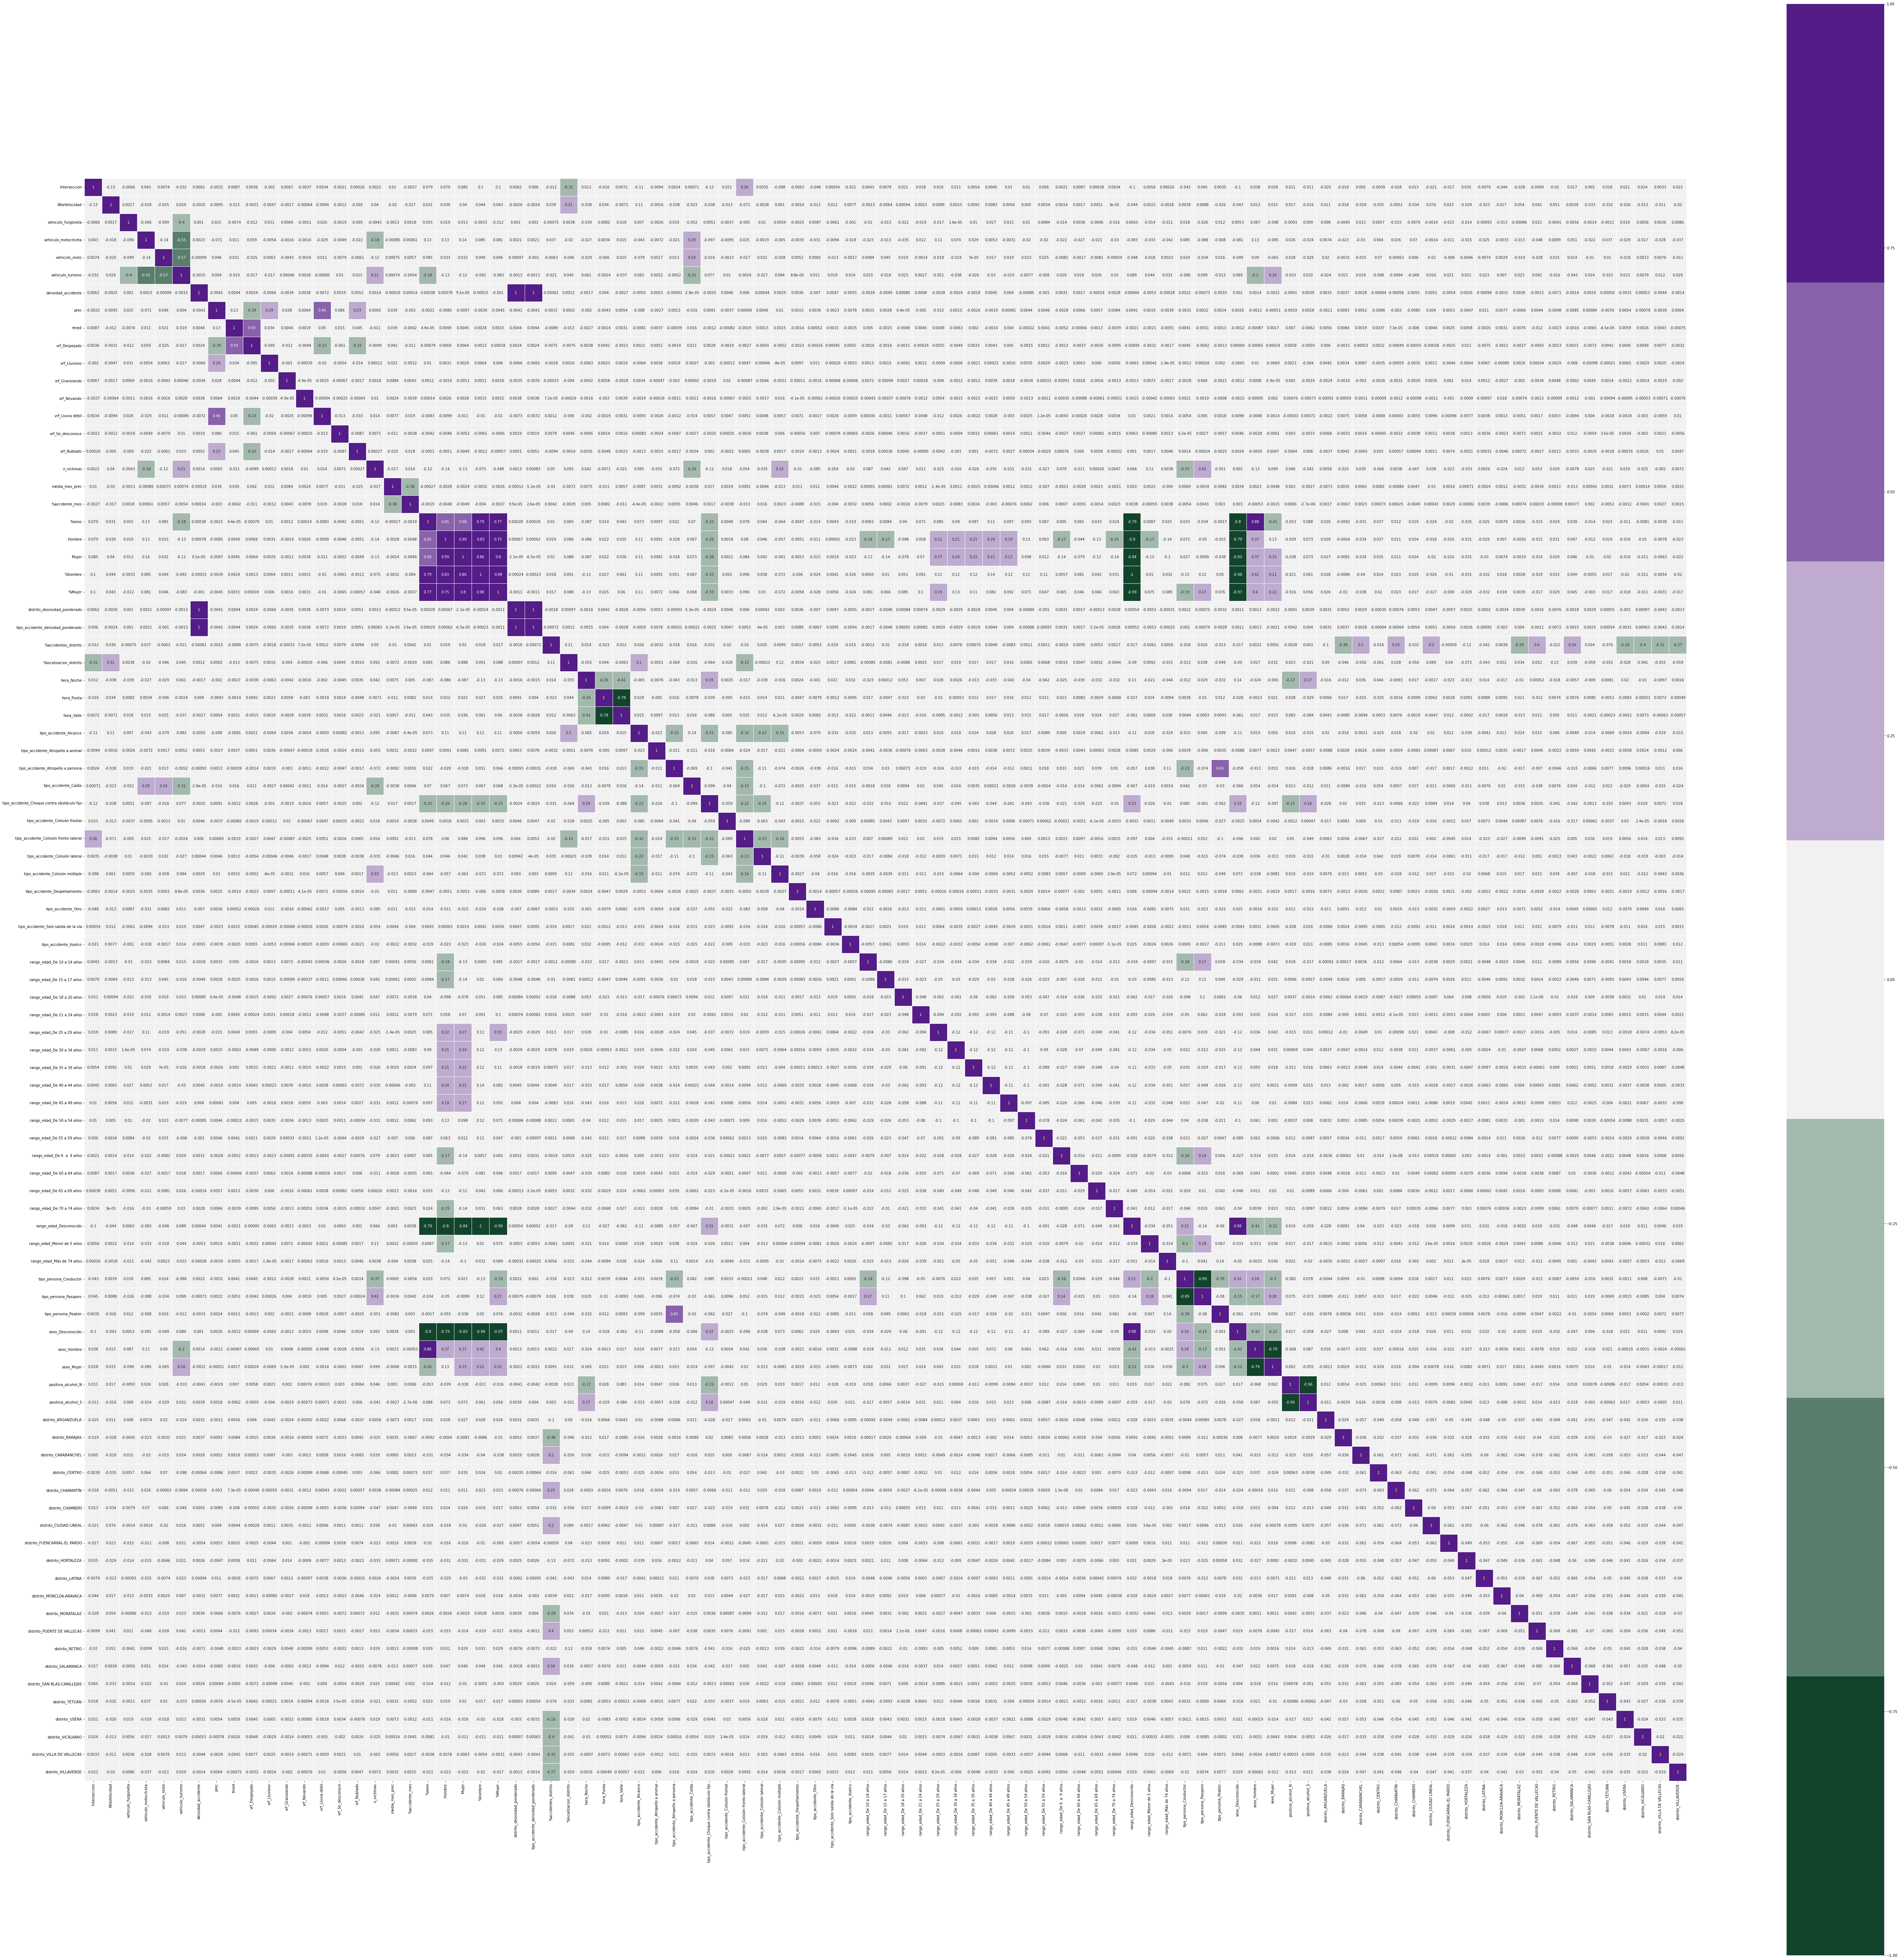

In [7]:
from IPython.display import HTML
plt.figure(figsize=(100,100))
sns.heatmap(df4.corr(),
           vmin = -1,
           vmax = 1,
           cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot = True,
           square = True,
           linewidths = 1);

In [8]:
pcas=[]
for i in range(91):
    pcas.append('PC'+str(i))

In [9]:
pca_pipe = make_pipeline(PCA())
pca_pipe.fit(df4[df4.columns.values[:]])
modelo_pca = pca_pipe.named_steps['pca']
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df4.columns[:],index   = [pcas])

,Interseccion,AltaVelocidad,vehiculo_furgoneta,vehiculo_motocilceta,vehiculo_resto,vehiculo_turismo,densidad_accidente,prec,tmed,vrf_Despejado,vrf_Lluvioso,vrf_Granizando,vrf_Nevando,vrf_Lluvia débil,vrf_Se_desconoce,vrf_Nublado,n_victimas,media_mes_prec,%accidente_mes,%sexo,Hombre,Mujer,%hombre,%Mujer,distrito_desnsidad_ponderado,tipo_accidente_densidad_ponderado,%accidentes_distrito,%localizacion_distrito,hora_Noche,hora_Punta,hora_Valle,tipo_accidente_Alcance,tipo_accidente_Atropello a animal,tipo_accidente_Atropello a persona,tipo_accidente_Caída,tipo_accidente_Choque contra obstáculo fijo,tipo_accidente_Colisión frontal,tipo_accidente_Colisión fronto-lateral,tipo_accidente_Colisión lateral,tipo_accidente_Colisión múltiple,tipo_accidente_Despeñamiento,tipo_accidente_Otro,tipo_accidente_Solo salida de la vía,tipo_accidente_Vuelco,rango_edad_De 10 a 14 años,rango_edad_De 15 a 17 años,rango_edad_De 18 a 20 años,rango_edad_De 21 a 24 años,rango_edad_De 25 a 29 años,rango_edad_De 30 a 34 años,rango_edad_De 35 a 39 años,rango_edad_De 40 a 44 años,rango_edad_De 45 a 49 años,rango_edad_De 50 a 54 años,rango_edad_De 55 a 59 años,rango_edad_De 6 a 9 años,rango_edad_De 60 a 64 años,rango_edad_De 65 a 69 años,rango_edad_De 70 a 74 años,rango_edad_Desconocido,rango_edad_Menor de 5 años,rango_edad_Más de 74 años,tipo_persona_Conductor,tipo_persona_Pasajero,tipo_persona_Peatón,sexo_Desconocido,sexo_Hombre,sexo_Mujer,positiva_alcohol_N,positiva_alcohol_S,distrito_ARGANZUELA,distrito_BARAJAS,distrito_CARABANCHEL,distrito_CENTRO,distrito_CHAMARTÍN,distrito_CHAMBERÍ,distrito_CIUDAD LINEAL,distrito_FUENCARRAL-EL PARDO,distrito_HORTALEZA,distrito_LATINA,distrito_MONCLOA-ARAVACA,distrito_MORATALAZ,distrito_PUENTE DE VALLECAS,distrito_RETIRO,distrito_SALAMANCA,distrito_SAN BLAS-CANILLEJAS,distrito_TETUÁN,distrito_USERA,distrito_VICÁLVARO,distrito_VILLA DE VALLECAS,distrito_VILLAVERDE
PC0,-0.02,-0.00,-0.00,-0.01,-0.01,0.02,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.02,0.00,0.00,-0.22,-0.54,-0.51,-0.46,-0.39,-0.00,-0.00,-0.00,-0.03,0.01,-0.00,-0.01,-0.02,-0.00,-0.00,-0.01,0.04,-0.00,-0.01,-0.01,0.01,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.01,-0.02,-0.02,-0.02,-0.02,-0.02,-0.01,-0.01,0.00,0.00,0.00,0.00,0.11,0.00,0.00,0.00,-0.00,0.00,0.10,-0.08,-0.02,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00
PC1,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.58,0.00,-0.03,-0.01,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.57,-0.57,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00
PC2,-0.00,0.00,0.00,-0.00,-0.00,0.01,0.02,-0.08,-0.98,-0.17,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,0.00,-0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.01,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00
PC3,0.00,-0.00,0.01,-0.03,0.02,0.01,0.00,0.94,-0.03,-0.28,0.03,0.00,0.00,0.10,0.01,0.04,0.02,0.01,-0.00,0.04,-0.07,-0.05,0.06,0.08,0.00,0.00,0.00,0.01,-0.00,-0.00,0.01,-0.00,-0.00,0.01,-0.01,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.01,0.00,0.01,0.00,-0.01,-0.01,-0.01,-0.01,-0.00,0.00,0.00,0.00,0.01,0.01,0.01,-0.02,0.01,0.01,-0.03,0.02,0.01,-0.02,0.02,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
PC4,0.03,0.00,-0.01,-0.03,0.01,0.03,0.00,-0.15,0.01,0.04,-0.00,0.00,-0.00,-0.02,-0.00,-

In [10]:
# GUARDADO DE MODELO PCA
filename = 'pca_pipe.sav'
pickle.dump(pca_pipe, open(filename, 'wb'))

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.35003706 0.5100658  0.65126922 0.69242126 0.73079765 0.76082867
 0.78721447 0.80618579 0.82045593 0.83236047 0.84299508 0.8522573
 0.86101983 0.86867512 0.8759868  0.88223069 0.88803846 0.8930924
 0.89805301 0.90288047 0.90760798 0.9121199  0.91655019 0.92084324
 0.92477784 0.92853771 0.93199916 0.935261   0.93846989 0.94153503
 0.94454562 0.94750223 0.95040255 0.9528241  0.9551787  0.95751509
 0.95981628 0.96208055 0.96432566 0.9665483  0.96873593 0.97090873
 0.97295987 0.97493996 0.97690434 0.97881756 0.98065996 0.98230941
 0.98391655 0.98525767 0.98656579 0.98781495 0.98905319 0.99005828
 0.99101931 0.99196234 0.99282656 0.9936834  0.99453129 0.99533507
 0.99607801 0.99671127 0.99731599 0.99792006 0.99835738 0.99873127
 0.99905013 0.99935831 0.99954665 0.99970202 0.99985282 0.99993511
 0.99998432 0.99999019 0.99999602 0.99999916 1.         1.
 1.       

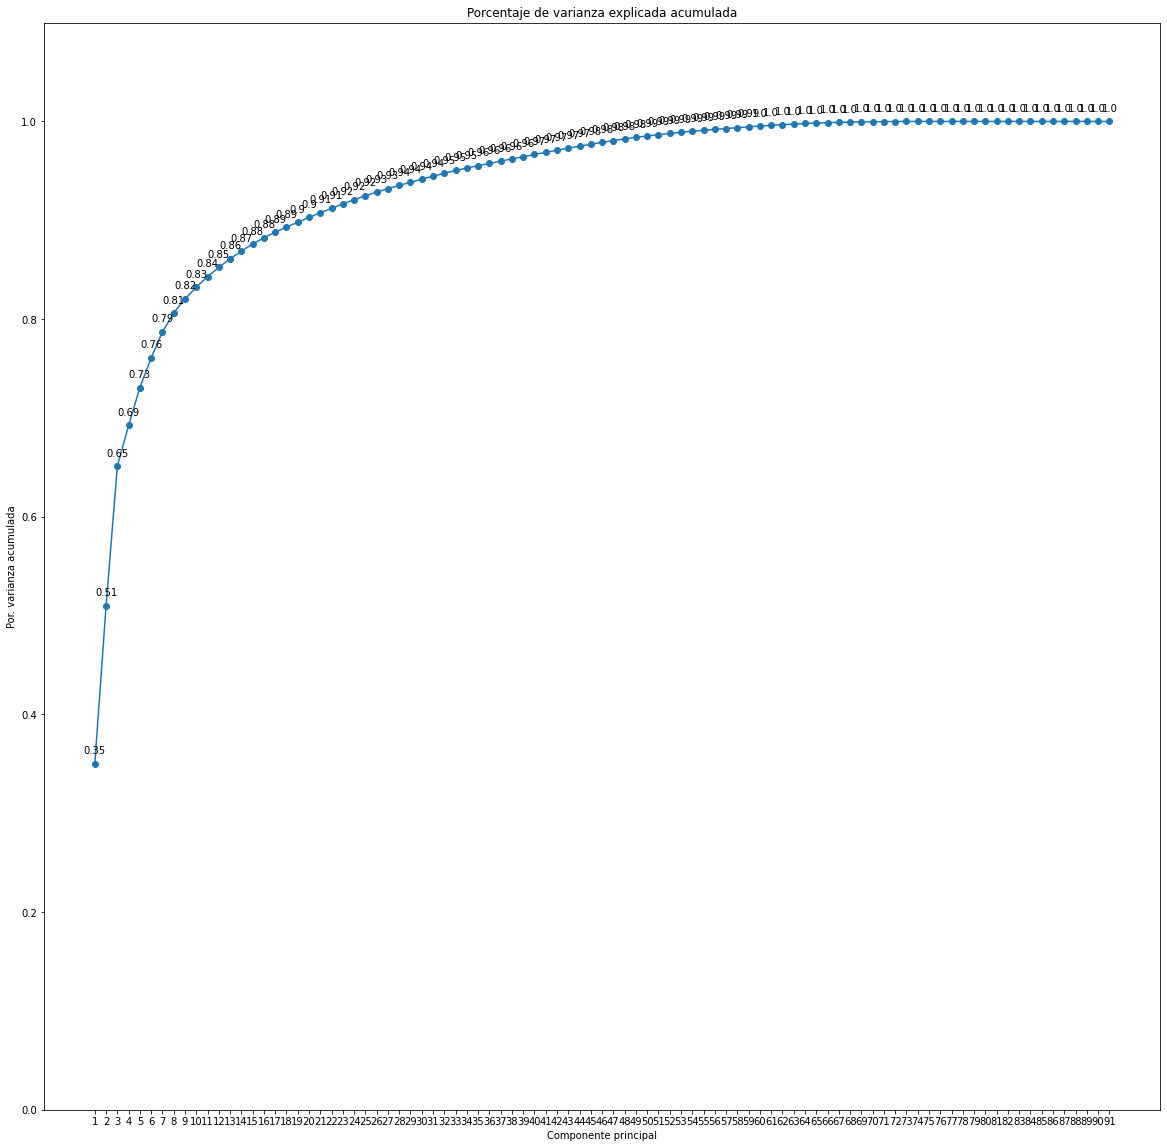

In [11]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
ax.plot(
    np.arange(len(df4.columns[:])) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df4.columns[:])) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

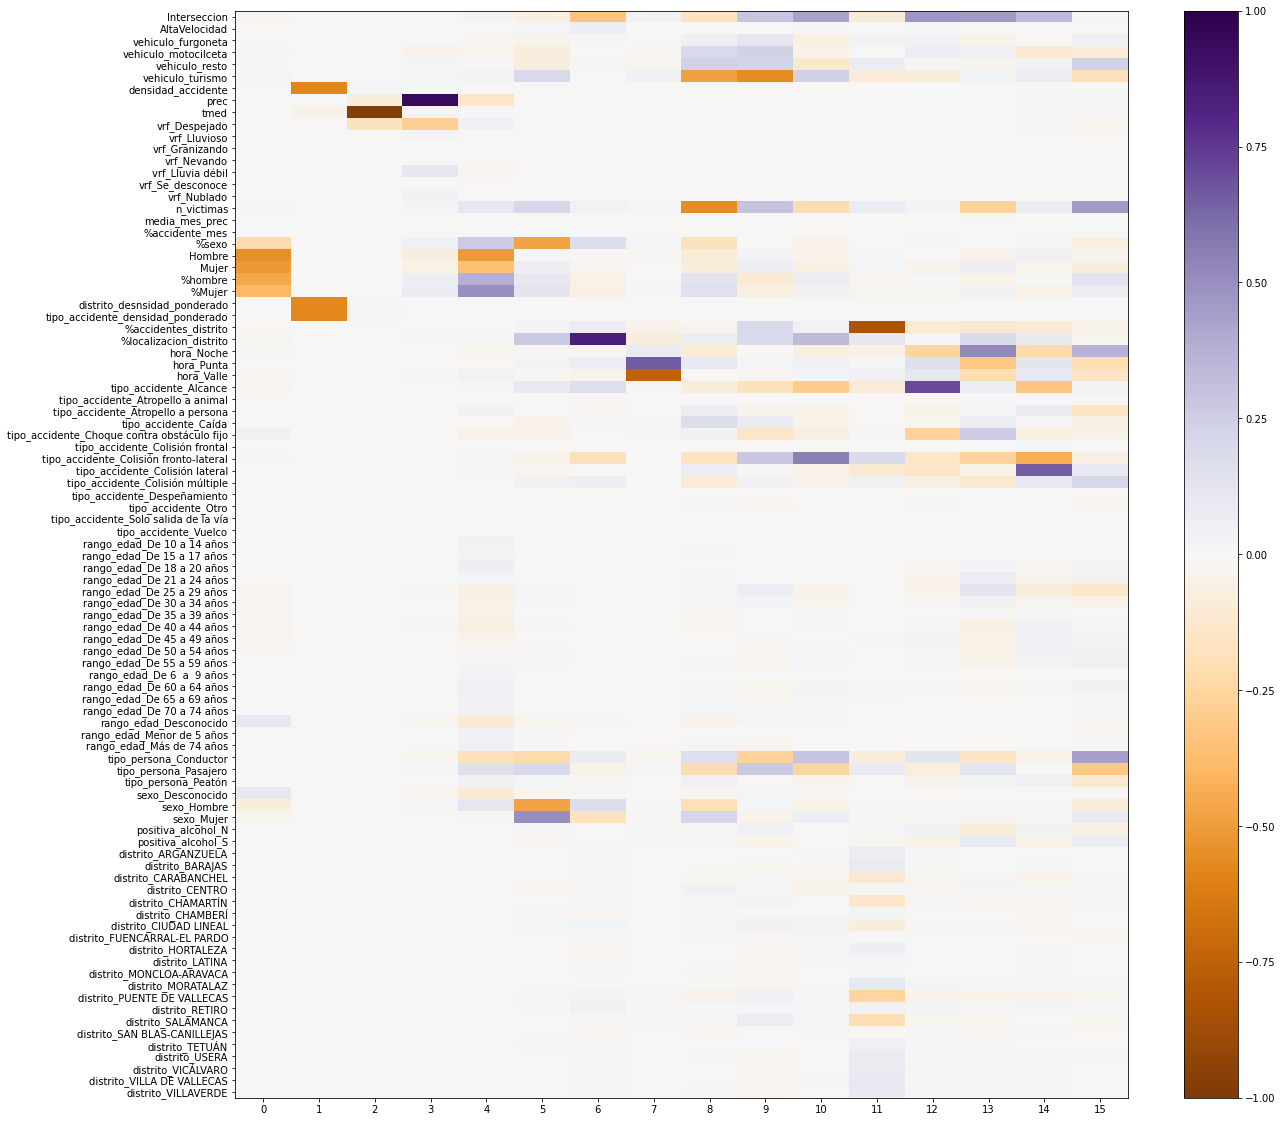

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
componentes = modelo_pca.components_
plt.imshow(componentes[0:16].T, cmap='PuOr', aspect='auto',vmin = -1,vmax = 1)
plt.yticks(range(len(df4.columns[:])), df4.columns[:])
plt.xticks(range(16))
plt.grid(False)
plt.colorbar();

In [13]:
proyecciones = pca_pipe.transform(df4)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = [pcas],
    index   = df4.index
              )
proyecciones

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90
0,-1.16,0.74,-0.01,-0.38,-0.28,-0.48,-0.21,0.21,-0.12,-0.23,0.18,-0.41,-0.21,0.83,-0.14,-0.06,0.22,0.01,-0.28,-0.33,-0.03,-0.15,-0.12,0.42,-0.03,-0.02,-0.09,0.13,-0.06,0.30,-0.18,-0.54,0.15,-0.05,-0.02,0.01,-0.04,-0.14,-0.06,-0.07,0.02,-0.08,-0.04,-0.15,0.02,-0.03,-0.02,-0.04,0.01,-0.01,-0.01,0.06,0.06,0.01,0.01,0.00,-0.02,0.01,0.01,-0.01,0.00,-0.00,-0.07,0.02,0.00,-0.00,-0.00,0.00,0.15,0.02,0.00,0.71,-0.00,0.00,-0.01,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00
1,-1.15,-0.41,-1.14,-0.40,-0.23,-0.39,-0.18,0.21,-0.35,-0.11,0.09,-0.38,-0.20,0.73,-0.11,0.13,0.26,0.09,-0.31,-0.34,-0.05,0.01,-0.04,0.32,-0.03,0.01,-0.11,0.14,-0.07,0.27,-0.17,-0.52,0.05,-0.05,-0.05,0.01,-0.12,-0.06,-0.02,-0.10,0.04,-0.09,-0.05,-0.05,0.02,-0.05,-0.02,-0.03,-0.00,-0.02,-0.02,0.06,0.07,0.01,0.03,0.01,0.00,0.02,0.01,-0.01,0.00,-0.00,0.05,-0.02,0.00,-0.00,0.00,0.00,0.15,0.02,-0.00,0.71,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
2,-0.96,2.40,-1.23,-0.41,-0.28,0.92,-0.63,0.21,-0.20,0.22,-0.18,-0.29,-0.32,0.90,-0.10,-0.23,0.11,-0.09,-0.27,-0.32,-0.02,-0.04,0.00,0.24,0.03,-0.00,-0.08,0.12,-0.02,0.29,-0.21,-0.57,0.16,-0.07,-0.02,0.01,-0.11,-0.03,0.01,-0.07,0.02,-0.06,-0.04,-0.16,0.06,-0.04,-0.00,-0.03,-0.00,-0.02,-0.02,0.06,0.08,0.01,0.03,-0.00,-0.02,0.04,0.01,0.02,0.00,-0.01,0.06,0.01,-0.00,-0.00,0.00,-0.00,0.15,0.02,-0.00,0.71,-0.00,0.00,-0.01,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00
3,-0.77,-0.54,-0.99,-0.26,0.00,-0.44,-0.16,0.21,-0.30,-0.20,0.16,-0.40,-0.14,0.59,-0.02,0.28,-0.13,-0.08,0.12,0.00,0.04,-0.05,0.12,0.29,0.56,-0.00,-0.02,0.11,-0.34,0.27,-0.20,-0.51,0.03,-0.06,-0.05,0.01,-0.11,-0.06,-0.01,-0.13,0.05,-0.09,-0.06,-0.05,-0.03,-0.02,-0.03,-0.03,-0.01,-0.02,-0.03,0.06,0.07,0.01,0.02,0.02,0.00,0.02,0.00,-0.01,0.00,0.00,0.05,-0.02,0.00,-0.01,-0.00,0.00,0.16,0.02,-0.00,0.71,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00
4,-1.07,4.56,-1.53,1.52,-0.54,-0.44,-0.18,0.24,-0.31,-0.22,0.08,-0.39,-0.35,0.86,-0.13,0.14,0.03,0.23,0.11,0.47,-0.38,0.08,-0.09,-0.16,-0.05,0.05,-0.20,0.16,-0.11,0.20,-0.18,-0.47,-0.17,-0.05,-0.16,0.01,-0.33,0.01,0.03,-0.15,0.06,-0.11,-0.03,-0.04,0.03,-0.02,-0.03,-0.01,-0.19,-0.04,-0.04,-0.00,-0.03,0.01,0.00,-0.00,0.04,0.04,-0.10,0.01,0.00,-0.01,0.05,-0.02,0.00,0.00,-0.09,-0.00,-0.00,-0.00,-0.02,0.00,0.01,-0.01,0.01,-0.03,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108233,-1.13,-1.48,-1.16,-0.38,-0.18,-0.55,-0.18,0.60,0.27,0.40,-0.18,0.46,0.24,0.11,0.25,0.20,-0.09,0.31,-0.18,0.49,-0.46,0.07,-0.23,0.11,-0.04,-0.37,0.14,-0.05,-0.01,-0.03,-0.02,-0.06,0.10,-0.05,0.10,0.00,-0.01,0.09,0.04,-0.14,0.03,-0.09,-0.13,0.42,-0.03,-0.17,-0.16,-0.21,-0.00,0.42,-0.38,-0.16,-0.03,-0.14,-0.00,-0.01,0.02,-0.02,-0.00,0.00,-0.03,-0.01,-0.08,0.04,0.01,-0.00,0.00,0.01,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
108234,-0.90,-1.28,-1.17,-0.39,-0.22,0.75,-0.62,0.59,0.42,0.72,-0.45,0.55,0.13,0.24,0.29,-0.12,-0.43,0.11,-0.22,0.25,0

In [14]:
X=proyecciones[pcas[:16]]
X

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-1.16,0.74,-0.01,-0.38,-0.28,-0.48,-0.21,0.21,-0.12,-0.23,0.18,-0.41,-0.21,0.83,-0.14,-0.06
1,-1.15,-0.41,-1.14,-0.40,-0.23,-0.39,-0.18,0.21,-0.35,-0.11,0.09,-0.38,-0.20,0.73,-0.11,0.13
2,-0.96,2.40,-1.23,-0.41,-0.28,0.92,-0.63,0.21,-0.20,0.22,-0.18,-0.29,-0.32,0.90,-0.10,-0.23
3,-0.77,-0.54,-0.99,-0.26,0.00,-0.44,-0.16,0.21,-0.30,-0.20,0.16,-0.40,-0.14,0.59,-0.02,0.28
4,-1.07,4.56,-1.53,1.52,-0.54,-0.44,-0.18,0.24,-0.31,-0.22,0.08,-0.39,-0.35,0.86,-0.13,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108233,-1.13,-1.48,-1.16,-0.38,-0.18,-0.55,-0.18,0.60,0.27,0.40,-0.18,0.46,0.24,0.11,0.25,0.20
108234,-0.90,-1.28,-1.17,-0.39,-0.22,0.75,-0.62,0.59,0.42,0.72,-0.45,0.55,0.13,0.24,0.29,-0.12
108235,0.50,-1.28,-1.16,-0.13,1.53,-0.34,-0.24,0.64,0.32,0.61,-0.39,0.51,0.16,0.28,0.25,-0.16
108236,-0.80,1.08,2.08,-0.08,-0.09,-0.75,-0.22,0.59,0.72,0.15,0.03,0.40,0.26,0.22,0.25,-0.02


In [15]:
df8=target.reset_index()
listale=df8['lesividad'].unique()
listapa=['catorce','siete','seis','dos','cinco','uno','tres','setentaysiete','cuatro']
df9=pd.DataFrame(list(zip(listale,listapa)), columns=('lesividad','lesividadpalabra'))
df9

,lesividad,lesividadpalabra
0,14,catorce
1,2,siete
2,7,seis
3,6,dos
4,1,cinco
5,3,uno
6,5,tres
7,4,setentaysiete
8,77,cuatro


In [16]:
df10=pd.merge(df8,df9,on='lesividad')
target2=df10['lesividadpalabra']

In [17]:
y=target2
y

0         catorce
1         catorce
2         catorce
3         catorce
4         catorce
           ...   
108233     cuatro
108234     cuatro
108235     cuatro
108236     cuatro
108237     cuatro
Name: lesividadpalabra, Length: 108238, dtype: object

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.20,  # el 90% de las filas serán para entrenar y el 10% para probar si ha ido bien
    random_state=0, 
    stratify=y)  # no coloquéis stratify si el problema es de regresión
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(86590, 16)
(86590,)
(21648,)


In [19]:
# dividir es opcional
X_train_final, X_dev, y_train_final, y_dev = train_test_split(X_train, y_train,  # columna objetivo, nuestra y
    test_size=0.10,  # En este caso, test_size se refiere al tamaño de X_dev y y_dev
    random_state=0, 
    stratify=y_train) # Cuando sea Problema de Regresión QUITAD el stratify

# X_train_final,y_train_final <<<<<  Los datos con los que vamos a entrenar 70%
# X_dev, y_dev <<<<<<< Los datos que vamos a meter en el Cross-Validation  20%
# X_test, y_test <<<<<< Los datos que utilizaremos para probar todo al final 10%
print("X_train: ",X_train.shape)
print("X_train_final: ",X_train_final.shape)
print("X_dev: ",X_dev.shape)
print("X_test: ",X_test.shape)

X_train:  (86590, 16)
X_train_final:  (77931, 16)
X_dev:  (8659, 16)
X_test:  (21648, 16)


In [20]:
X_train_dev_final, X_test_dev, y_train_dev_final, y_test_dev = train_test_split(X_dev, y_dev,  # columna objetivo, nuestra y
    test_size=0.20,  # En este caso, test_size se refiere al tamaño de X_dev y y_dev
    random_state=0, 
    stratify=y_dev) 

In [21]:
# Lazy Predict test
LC = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
model,predictions = LC.fit(X_train_dev_final, X_test_dev, y_train_dev_final, y_test_dev)
predictions['F1 Score'].sort_values(ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:23<00:00,  1.21it/s]


Model
BaggingClassifier               0.73
XGBClassifier                   0.72
LGBMClassifier                  0.72
RandomForestClassifier          0.71
DecisionTreeClassifier          0.70
ExtraTreesClassifier            0.70
ExtraTreeClassifier             0.68
KNeighborsClassifier            0.66
GaussianNB                      0.66
LinearDiscriminantAnalysis      0.65
LogisticRegression              0.65
QuadraticDiscriminantAnalysis   0.64
CalibratedClassifierCV          0.64
SGDClassifier                   0.64
LabelSpreading                  0.64
LabelPropagation                0.64
SVC                             0.64
BernoulliNB                     0.64
PassiveAggressiveClassifier     0.63
LinearSVC                       0.62
RidgeClassifierCV               0.62
RidgeClassifier                 0.62
Perceptron                      0.61
DummyClassifier                 0.59
NearestCentroid                 0.47
AdaBoostClassifier              0.30
Name: F1 Score, dtype: float64

In [22]:
# Lazy Predict FINAL
LC = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
model,predictions = LC.fit(X_train, X_test, y_train, y_test)
predictions['F1 Score'].sort_values(ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [20:33<00:00, 42.53s/it]


Model
BaggingClassifier               0.82
ExtraTreesClassifier            0.81
RandomForestClassifier          0.81
DecisionTreeClassifier          0.80
XGBClassifier                   0.77
ExtraTreeClassifier             0.75
LGBMClassifier                  0.71
KNeighborsClassifier            0.69
GaussianNB                      0.66
LinearDiscriminantAnalysis      0.66
LogisticRegression              0.65
CalibratedClassifierCV          0.64
QuadraticDiscriminantAnalysis   0.64
SVC                             0.64
BernoulliNB                     0.64
SGDClassifier                   0.64
Perceptron                      0.64
PassiveAggressiveClassifier     0.63
RidgeClassifierCV               0.62
RidgeClassifier                 0.62
LinearSVC                       0.62
DummyClassifier                 0.58
NearestCentroid                 0.47
AdaBoostClassifier              0.10
Name: F1 Score, dtype: float64